### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt  
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [28]:
Ratings  = pd.read_csv('Data.csv') # Import the dataset named 'Data.csv showing user rating on movies 
Movies = pd.read_csv('item.csv') #import item.csv showing information about th movies 
Users = pd.read_csv('user.csv')# import user.csv showing users who rated th movies 


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [29]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [30]:
Ratings.shape

(100000, 4)

In [31]:
Ratings.describe()
print("missing values" )
print(Ratings.isnull().sum())

missing values
user id      0
movie id     0
rating       0
timestamp    0
dtype: int64


In [32]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [33]:
print(Movies.shape)
Movies.describe()
print("Number of missing values ")
print(Movies.isnull().sum())

(1681, 22)
Number of missing values 
movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


In [34]:
Users.info()
print(Users.shape)
print("Number of missing values ")
print(Users.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
(943, 5)
Number of missing values 
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


In [35]:
Users.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [36]:
# 4. Find the number of movies per genre using the item data - 5 marks


In [37]:
Movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [38]:
Movies.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [39]:
# use sum on the default axis

#### 5. Find the movies that have more than one genre - 2.5 marks

In [40]:
#hint: use sum on the axis = 1

In [41]:
movies_with_more_one_genre = Movies[(Movies.iloc[:,3:].sum(axis =1 )>1)]
movies_with_more_one_genre['movie title']


0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [42]:

df = Movies[Movies.unknown != 1]
df


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [43]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [44]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


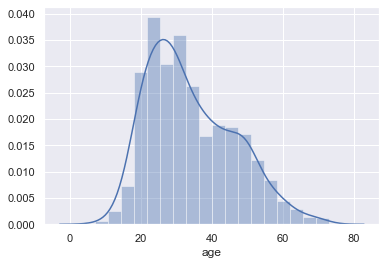

In [45]:
#your answers here

sns.distplot(Users['age']);


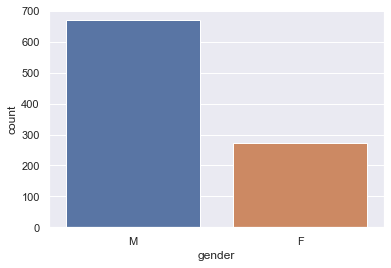

In [46]:
sns.countplot(Users['gender'])

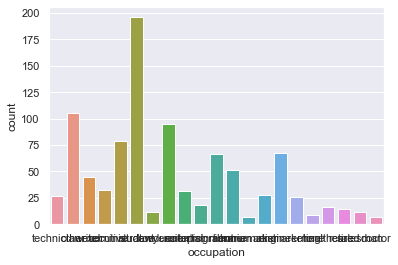

In [47]:
sns.countplot(Users['occupation'])

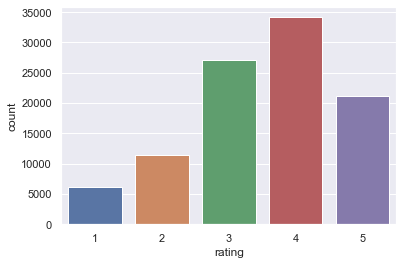

In [48]:
sns.countplot(Ratings['rating'])

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: Year, Length: 1681, dtype: int32


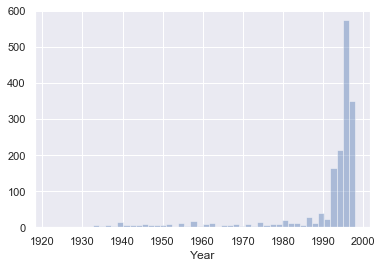

In [49]:

date_list = Movies['release date'].str.split("-").tolist()
df2 = pd.DataFrame(date_list, columns =['Day','Month','Year'])
df2["Year"]= df2["Year"].astype(int)
sns.distplot(df2['Year'], kde=False);
print(df2['Year'])


### 8. Visualize how popularity of genres has changed over the years - 10 marks¶

Note that you need to use the number of releases in a year as a parameter of popularity of a genre



Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

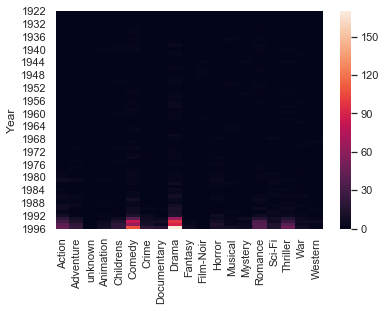

In [50]:
#Your answer here
date_list = Movies['release date'].str.split("-").tolist()
df3 = pd.DataFrame(date_list, columns =['Day','Month','Year'])
result = pd.concat([Movies, df3], axis=1, sort=False)
#print(result.head())

                    
grouped = result.groupby('Year')

genre_year = grouped['Action','Adventure','unknown',
'Animation',
'Childrens',
'Comedy',
'Crime',
'Documentary',
'Drama',
'Fantasy',
'Film-Noir',
'Horror',
'Musical',
'Mystery',
'Romance',
'Sci-Fi',
'Thriller',
'War',
'Western'].agg(np.sum)

heat_map = sns.heatmap(genre_year)
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [61]:
#your answer here

#group ratings by movie id
grouped = Ratings.groupby('movie id')

# get number of ratings per movie id group
Movie_ratings =grouped.agg(np.size)
#get movies with number of ratings more than 100  
Top_movies = Movie_ratings[Movie_ratings['rating'] > 100]
#merge with movie table to get correponding movie titles 
Top_movie_titles = pd.merge(Top_movies,Movies,on='movie id') 
Top_movies_list = Top_movie_titles['movie title'].tolist()
#print(Top_movies_list)

#merge all movies and ratings to calculate average ratings
movie_titles_ratings = pd.merge(Ratings,Movies,on='movie id') 
grouped = movie_titles_ratings.groupby('movie title')
#grouped.groups

average_ratings = grouped['rating'].agg([np.mean])
average_ratings.sort_values(by=['mean'], inplace=True, ascending=False)
#average_ratings.loc[average_ratings['movie title'].isin(Top_movies_list)]
average_ratings
#"average_ratings.isin(Top_movies_list)



,mean
movie title,
"Great Day in Harlem, A",5.0
Prefontaine,5.0
Someone Else's America,5.0
Marlene Dietrich: Shadow and Light (,5.0
Entertaining Angels: The Dorothy Day Story,5.0
...,...
Shadows (Cienie),1.0
Shadow of Angels (Schatten der Engel),1.0
Office Killer,1.0


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [68]:

movies_drama = Movies[Movies['Drama'] == 1]
movies_drama_ratings = pd.merge(Ratings,movies_drama,on='movie id')
movies_drama_ratings_user = pd.merge(movies_drama_ratings,Users,on='user id')
grouped = movies_drama_ratings_user.groupby(['gender'])
ratingbygender = grouped['rating'].agg(np.sum)


print("Rating distribution for Drama")
print(ratingbygender)

movies_scifi = Movies[Movies['Sci-Fi'] == 1]
movies_scifi_ratings = pd.merge(Ratings,movies_scifi,on='movie id')
movies_scifi_ratings_user = pd.merge(movies_scifi_ratings,Users,on='user id')
grouped = movies_scifi_ratings_user.groupby(['gender'])
ratingbygender = grouped['rating'].agg(np.sum)
print("Rating distribution for Sci-Fi ")
print(ratingbygender)

movies_romance = Movies[Movies['Romance'] == 1]
movies_romance_ratings = pd.merge(Ratings,movies_romance,on='movie id')
movies_romance_ratings_user = pd.merge(movies_romance_ratings,Users,on='user id')
grouped = movies_romance_ratings_user.groupby(['gender'])
ratingbygender = grouped['rating'].agg(np.sum)
print("Rating distribution for Romance")

print(ratingbygender)



Rating distribution for Drama
gender
F     40314
M    106794
Name: rating, dtype: int64
Rating distribution for Sci-Fi 
gender
F     9196
M    36132
Name: rating, dtype: int64
Rating distribution for Romance
gender
F    21415
M    49067
Name: rating, dtype: int64


More men watch Drama than women-- Valid

Women watch more Sci-Fi than men --invalid

Men watch more romance than women --valid